# Group Project: Web-Scraping
# LGBT Representation in Video Games

In [1]:
# Begin by opening the url
import urllib.request
url = "https://en.wikipedia.org/wiki/List_of_video_games_with_LGBT_characters"
page = urllib.request.urlopen(url)

# Import BeautifulSoup so we can work with the data, then parse the html
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")


In [2]:
# The following code will generate a LOT of code. It is commented 
# out for readability but represents the parsed html data.
# print(soup.prettify())

In [3]:
# This identifies and prints the title of the page
soup.title
soup.title.string

'List of video games with LGBT characters - Wikipedia'

In [4]:
# Using the 'find_all' function we pull all instances in the 
# 'table' tag with class = 'wikitable sortable'
# the print statement has been commented out for readability
all_sortable_tables = soup.find_all('table', class_='wikitable sortable')
# all_sortable_tables

In [5]:
# The data is made up of many tables broken up into alphabetical
# order and by year. We are indexing the tables separately so that
# we can parse through each individual table and add the data together.

table1 = all_sortable_tables[0]
table2 = all_sortable_tables[1]
table3 = all_sortable_tables[2]
table4 = all_sortable_tables[3]
table5 = all_sortable_tables[4]
table6 = all_sortable_tables[5]
table7 = all_sortable_tables[6]
table8 = all_sortable_tables[7]
table9 = all_sortable_tables[8]
table10 = all_sortable_tables[9]
table11 = all_sortable_tables[10]
table12 = all_sortable_tables[11]
table13 = all_sortable_tables[12]

# The tables are saved in a list to be accessed later
all_tables = [table1, table2, table3, table4, table5, table6,
             table7, table8, table9, table10, table11, table12,
             table13]

# The print statement is commented out for readability
# right_table

In [6]:
# We create variables to store the various columns, and then iterators 
# through the data to add the correct information to the applicable 
# entry.

series=[]
year=[]
title=[]
character=[]
classification=[]
notes=[]
developer=[]
i = 0


for table in all_tables:
    i = i +1
    if i < 5:
        for row in table.find_all('tr'):
            cells=row.find_all('td')
            if len(cells)==7:
                series.append(cells[0].find(text=True).strip())
                year.append(cells[1].find(text=True).strip())
                title.append(cells[2].find(text=True).strip())
                character.append(cells[3].find(text=True).strip())
                classification.append(cells[4].find(text=True).strip())
                notes.append(cells[5].find(text=True).strip())
                developer.append(cells[6].find(text=True).strip())
    
    
    # The format shifts after the fourth table, so we account for this in the else loop
    else:
        for row in table.find_all('tr'):
            cells=row.find_all('td')
            if len(cells)==8:
                series.append(['N/A'])
                year.append(cells[0].find(text=True).strip())
                title.append(cells[1].find(text=True).strip())
                character.append(cells[2].find(text=True).strip())
                classification.append(cells[3].find(text=True).strip())
                notes.append(cells[4].find(text=True).strip())
                developer.append(cells[5].find(text=True).strip())
                i = i + 1
        


In [7]:
# Imports pandas, creates a DataFrame for the parsed data
# sets the columns with lables and prints the DataFrame.

import pandas as pd 
df = pd.DataFrame(series, columns=['Series'])
df['Year']=year
df['Title']=title
df['Character']=character
df['Classification']=classification
df['Notes']=notes
df['Developer']=developer
df

,Series,Year,Title,Character,Classification,Notes,Developer
0,A Kiss for the Petals,2006–2016,All,"Various girls, Teachers and Nurses",Lesbian,A series of,Fuguriya
1,Ace Attorney,2004,Phoenix Wright: Ace Attorney − Trials and Trib...,Jean Armstrong,Gay,Trials and Tribulations,Capcom
2,Baldur's Gate,2012,Baldur's Gate: Enhanced Edition,Gorion's Ward,"Potentially gay, or bisexual",The Gorion's Ward is the male or female protag...,Overhaul Games
3,Borderlands,2009,Borderlands,Mad Moxxi,Bisexual or Pansexual,Mad Moxxi's appearances include,Gearbox Software
4,Danganronpa,2010,Danganronpa: Trigger Happy Havoc,Mukuro Ikusaba,Lesbian or bisexual,In,Spike Chunsoft
...,...,...,...,...,...,...,...
147,[N/A],2020,Please Be Happy,TBA,Lesbian,The story is about love between women.,Visual novel
148,[N/A],2020,Project Sekai: Colorful Stage feat. Hatsune Miku,Akiyama Mizuki,Non-binary or agender,Mizuki's in-game bio page lists their gender a...,Rhythm game
149,[N/A],2021,Goodbye Volcano High,Fang,Non-binary,"The main protagonist, Fang, is classified as n...",Narrative
150,[N/A],2021,Vampire: The Masquerade – Bloodlines 2,Player character,,"Players will be able to choose pronouns, with ...",Action role-playing game


In [8]:
# Saves the DataFrame (df) to a CSV file named: 
# 'CSC221_etscar_GroupProject.csv'
# using Panda's to_csv() function

# commented below code by Yang Kate Sun, since the path is specific to Evan's location machine environment
# uncomment to run; one thing that can be done is to only give the filename with extension, which
# will write the file in the same directory as the Python code.
# df.to_csv(r'C:\Users\etsca\Desktop\CSC221\Group Project\CSC221_etscar_GroupProject.csv',
#          index=False, header=True, encoding='utf-8-sig')

# learned the encoding trick from Kate, was getting weird symbols :) 


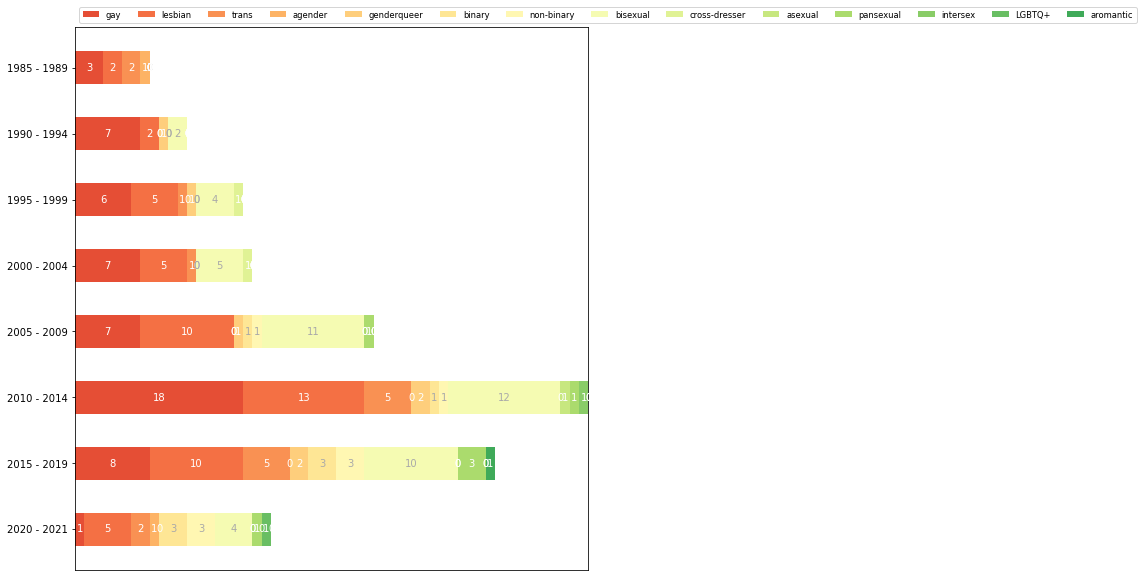

,gay,lesbian,trans,agender,genderqueer,binary,non-binary,bisexual,cross-dresser,asexual,pansexual,intersex,LGBTQ+,aromantic,Row Totals
1985 - 1989,3,2,2,1,0,0,0,0,0,0,0,0,0,0,8
1990 - 1994,7,2,0,0,1,0,0,2,0,0,0,0,0,0,12
1995 - 1999,6,5,1,0,1,0,0,4,1,0,0,0,0,0,18
2000 - 2004,7,5,1,0,0,0,0,5,1,0,0,0,0,0,19
2005 - 2009,7,10,0,0,1,1,1,11,0,0,1,0,0,0,32
2010 - 2014,18,13,5,0,2,1,1,12,0,1,1,1,0,0,55
2015 - 2019,8,10,5,0,2,3,3,10,0,0,3,0,0,1,45
2020 - 2021,1,5,2,1,0,3,3,4,0,0,1,0,1,0,21
Column Totals,57,52,16,2,7,8,8,48,2,1,6,1,1,1,210


In [9]:
# import required libaries for plotting graph (e.g. numpy and matplotlib)
import numpy as np
import matplotlib.pyplot as plt


# This function looks at each str_classifications string and finds all instances
# of category names. If one is found, then the corresponding counter in a list of 
# counters is incremented. dict_results holds the dictionary that would be later
# used by the matplotlib function to make the graph.
def update_results(list_years, str_classifications, dict_results):
    """
    Parameters
    ----------
    list_years : list of int
        list of years, where the str_classifications string is applicable.
        for most calls, it's a list of 1 year, but there are special cases
        in the dataset that has a labeling of multi-years.
    str_classifications: str
        classifications from one row within the df Dataframe
    dict_results : dictionary of results
        holds the y-axis labels and their corresponding lists of data
        to be updated within this function
    """
    for i in list_years:
        # if the year is not in the set_df_year set, then it's not in the dict_results
        # dictionary; in such a case, a new key:value pair is added to dict_results with
        # the year as the key and an all-zeors list as the value as the initial dictionary
        # entry.
        if str(i) not in set_df_year:
            dict_results[str(i)] = list_empty_category_counts.copy()
            set_df_year.add(str(i))
        else:
            pass
        
        # count up each of list_category_names and then add to existing corresponding values 
        # in dict_results using dict_category_names_enumerated indexing.
        for name in list_category_names:
            # assumes each str_classifications would only have 1 instance of each
            # category string; match is case insensivitive
            # Note that counting is based on all instances of category names and not year
            # based.  For example, if one game has listings of more than one category name,
            # then, each category name is counted for that game and year. So, if the 
            # str_classifications string has "gay, lesbian", then the count for gay is +1
            # and the count for lesbian is +1.  The reasoning is that one game may have
            # more than one character / portray of classifications.  Also, note that if 
            # the row has multi-year representation, then all years in the year range have
            # the same str_classifications value.
            if name.upper() in str_classifications.upper():
                dict_results[str(i)][dict_category_names_enumerated[name]] += 1
                
        # returns the updated dict_results dictonary
        return dict_results


# matplotlib function that takes a dictionary of results and a list of category names,
# and then creates a Discrete distribution as a horizontal bar chart.
# Code taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py
# modifications: increased figure size in height to better illustrate the many bars, and
# changed function name for easier understanding.
def graph_horizontal_bars(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


# based on sample Dataframe and csv file, these have been chosen as category strings.
# this is used by the matplotlib function to setup the data series names in the graph
list_category_names = ['gay', 'lesbian', 'trans', 'agender', 'genderqueer', 
                       'binary', 'non-binary', 'bisexual', 'cross-dresser', 
                       'asexual', 'pansexual', 'intersex', 'LGBTQ+', 'aromantic']

# an easy way of creating a "lookup" dictionary for category strings and 
# their corresponding position in the list_category_names list
# e.g. 'gay': 0, 'lesbian': 1, etc
dict_category_names_enumerated = {key: value for value, key in enumerate((list_category_names))}

# empty dictionary to later hold the y-axis labels and their corresponding lists of data.
# this holds data for the matplotlib function.
dict_results = {}

# this is used to conveniently hold the unique instances of "Year" of the df Dataframe
set_df_year = set()

# gets the number of rows and columns of the df Dataframe
int_rows, int_columns = df.shape

# holds the initial list of zero (0) values, which are then later updated.
# one zero for each of the category names
list_empty_category_counts = []
for item in list_category_names:
    list_empty_category_counts.append(0)

# list of years, where the str_classifications string is applicable.
# for most uses, it's a list of 1 year, but there are special cases
# in the dataset that has a labeling of multi-years. 
# Calls update_results function and looks at each str_classifications 
# string and finds all instances of category names. If one is found, 
# then the corresponding counter in a list of counters is incremented.
list_years = []
for i in range(int_rows):
    #print(df.loc[i])
    str_year = df.loc[i]['Year']
    if '2006–2016' in str_year:
        list_years = list(range(2006, 2017))
    elif '2011–15' in str_year:
        list_years = list(range(2011, 2015))
    elif '—' in str_year:
        # in the df Dataframe and csv file, the year column only has '—', and
        # the wiki has been referenced to get the corresponding years for the 
        # "Mass Effect" game.
        # ref: https://en.wikipedia.org/wiki/List_of_video_games_with_LGBT_characters
        list_years = [2007, 2010, 2012, 2017]            
    else:
        list_years = [int(str_year)]
    dict_results = update_results(list_years, df.loc[i]['Classification'], dict_results)

# sorts the dict_results dictionary by its key, which is the year
dict_results = dict(sorted(dict_results.items(), key=lambda x: x[0]))


# The below code block is used to combine multiple rows of data within the dict_results
# variable into a single row of data.  For each row within a year range of 
# multiple rows, it represents one unique year.  The single row of data output
# represents summarized data from a range of years.
# e.g. 5 rows of years 1985, 1986, 1987, 1988, 1989 returns one row of 
# "1985 - 1989"; Notice that int_bucket_size can be updated for another bucket size.
# Note: if one year is missing (not represented), then the code will skip it,
# whereas the ".add" function of a dictionary would return None, if a key is
# missing, instead of raising an error.
dict_combined_results = {}
list_sorted_df_year = list(sorted(set_df_year)) 
int_start_year = int(list_sorted_df_year[0])
int_end_year = int(list_sorted_df_year[-1])
int_bucket_size = 5

int_bucket_start = int_start_year
if (int_end_year - int_bucket_start) >= (int_bucket_size + 1):
    int_bucket_end = int_bucket_start + int_bucket_size
else:
    int_bucket_end = int_end_year + 1

for i in range((int_end_year - int_start_year) // int_bucket_size + 1):
    list_per_year = []
    for j in range(len(list_category_names)):
        int_total_count = 0
        for k in range(int_bucket_start, int_bucket_end):
            value = dict_results.get(str(k))
            if value:
                int_total_count += value[j]
            else:
                pass
        list_per_year.append(int_total_count)
    dict_combined_results[f'{int_bucket_start} - {int_bucket_end - 1}'] = list_per_year
    int_bucket_start = int_bucket_end
    if (int_end_year - int_bucket_start) >= (int_bucket_size + 1):
        int_bucket_end = int_bucket_start + int_bucket_size
    else:
        int_bucket_end = int_end_year + 1


# create a Dataframe from the dict_combined_results dictionary and take the category names from the
# list_category_names list as the column titles. Also, add row-wise and column-wise totals for completeness.
df_combined_results = pd.DataFrame.from_dict(dict_combined_results, orient='index', columns=list_category_names)
df_combined_results['Row Totals'] = df_combined_results.sum(axis=1)
df_combined_results.loc['Column Totals']= df_combined_results.sum()

# calls function to setup and create the horizontal bar graph
# Note: very important, the AxesSubplot object's attribute of "bar_label" is relatively new,
# and it's only in matplotlib since version 3.4 and later. Thus, I had to upgrade matplotlib (to 3.41).
#   ref: https://discourse.matplotlib.org/t/axessubplot-object-has-no-attribute-bar-label/21985/2
# Using command of "conda install -c conda-forge matplotlib=3.4.1"
#   ref: https://stackoverflow.com/questions/66932479/how-do-i-install-matplotlib-3-4-1-in-anaconda
graph_horizontal_bars(dict_combined_results, list_category_names)

# show the actual graph
plt.show()

# show the corresponding Dataframe to the graph, in case some in-graph values are difficult to see
df_combined_results